# CASE - BD

In [1]:
import basedosdados as bd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from scipy.stats import norm
import numpy as np
import seaborn as sns
import itertools
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature

In [2]:
res_part_mun = bd.read_table(dataset_id='br_tse_eleicoes', 
table_id='resultados_partido_municipio',
billing_project_id="projetoapp-340617")

Downloading: 100%|███████████████████████████████████████████████████████| 3128945/3128945 [08:34<00:00, 6086.37rows/s]


In [3]:
res_part_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128945 entries, 0 to 3128944
Data columns (total 10 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ano                 int64 
 1   turno               int64 
 2   tipo_eleicao        object
 3   sigla_uf            object
 4   id_municipio        object
 5   id_municipio_tse    object
 6   cargo               object
 7   sigla_partido       object
 8   votos_nominais      int64 
 9   votos_nao_nominais  int64 
dtypes: int64(4), object(6)
memory usage: 238.7+ MB


In [4]:
df1 = res_part_mun[res_part_mun["turno"] == 2]
df1 = df1[df1["ano"] == 2018]
df1 = df1[df1["cargo"] == "presidente"]
df1 = df1.reset_index()
df1["total_votos"] = df1["votos_nominais"] + df1["votos_nao_nominais"]
df1 = df1.drop(['index', 'votos_nominais', 'votos_nao_nominais', 'tipo_eleicao'], axis=1)
df1

,ano,turno,sigla_uf,id_municipio,id_municipio_tse,cargo,sigla_partido,total_votos
0,2018,2,AC,1200013,1120,presidente,PSL,5165
1,2018,2,AC,1200013,1120,presidente,PT,1300
2,2018,2,AC,1200054,1570,presidente,PSL,2333
3,2018,2,AC,1200054,1570,presidente,PT,1660
4,2018,2,AC,1200104,1058,presidente,PSL,8711
...,...,...,...,...,...,...,...,...
11477,2018,2,MG,3172004,54410,presidente,PT,9396
11478,2018,2,MG,3172103,54437,presidente,PSL,1098
11479,2018,2,MG,3172103,54437,presidente,PT,1662
11480,2018,2,MG,3172202,54216,presidente,PSL,1458


In [5]:
pt = df1[df1['sigla_partido']=='PT']
pt = pt.rename(columns={'total_votos':'votos_PT'})
pt = pt.reset_index()
pt = pt.drop(['index','sigla_partido'], axis=1)
pt

,ano,turno,sigla_uf,id_municipio,id_municipio_tse,cargo,votos_PT
0,2018,2,AC,1200013,1120,presidente,1300
1,2018,2,AC,1200054,1570,presidente,1660
2,2018,2,AC,1200104,1058,presidente,3208
3,2018,2,AC,1200138,1007,presidente,1274
4,2018,2,AC,1200179,1015,presidente,1086
...,...,...,...,...,...,...,...
5736,2018,2,MG,3171808,54372,presidente,2821
5737,2018,2,MG,3171907,54399,presidente,1775
5738,2018,2,MG,3172004,54410,presidente,9396
5739,2018,2,MG,3172103,54437,presidente,1662


In [6]:
psl = df1[df1['sigla_partido']=='PSL']
psl = psl[['id_municipio','total_votos']]
psl = psl.rename(columns={'total_votos':'votos_PSL'})
psl = psl.reset_index()
psl = psl.drop(['index','id_municipio'],axis=1)
psl

,votos_PSL
0,5165
1,2333
2,8711
3,4676
4,3895
...,...
5736,2084
5737,851
5738,11264
5739,1098


In [7]:
df2 = pd.concat([pt,psl],axis=1)
df2

,ano,turno,sigla_uf,id_municipio,id_municipio_tse,cargo,votos_PT,votos_PSL
0,2018,2,AC,1200013,1120,presidente,1300,5165
1,2018,2,AC,1200054,1570,presidente,1660,2333
2,2018,2,AC,1200104,1058,presidente,3208,8711
3,2018,2,AC,1200138,1007,presidente,1274,4676
4,2018,2,AC,1200179,1015,presidente,1086,3895
...,...,...,...,...,...,...,...,...
5736,2018,2,MG,3171808,54372,presidente,2821,2084
5737,2018,2,MG,3171907,54399,presidente,1775,851
5738,2018,2,MG,3172004,54410,presidente,9396,11264
5739,2018,2,MG,3172103,54437,presidente,1662,1098


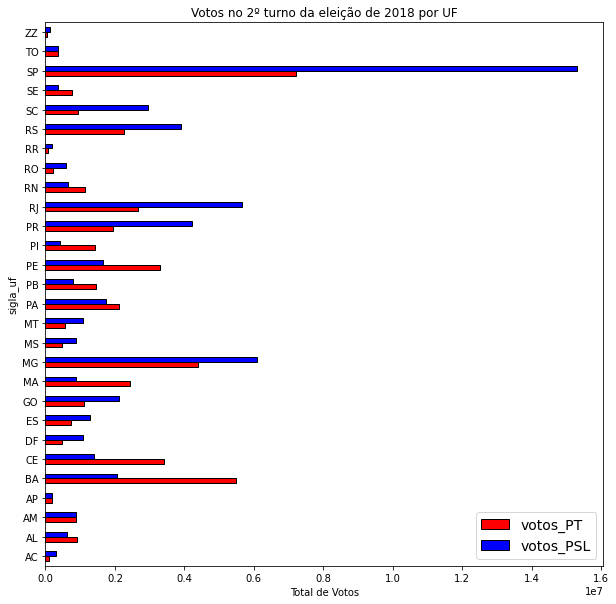

In [8]:
df2.groupby("sigla_uf").agg({"votos_PT":"sum","votos_PSL":"sum"}).plot(kind="barh",
                                                                       color=["r","b"],
                                                                       figsize = (10,10),
                                                                       edgecolor = "k",
                                                                       linewidth =1
                                                                                )

plt.title("Votos no 2º turno da eleição de 2018 por UF")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("Total de Votos")
plt.show()

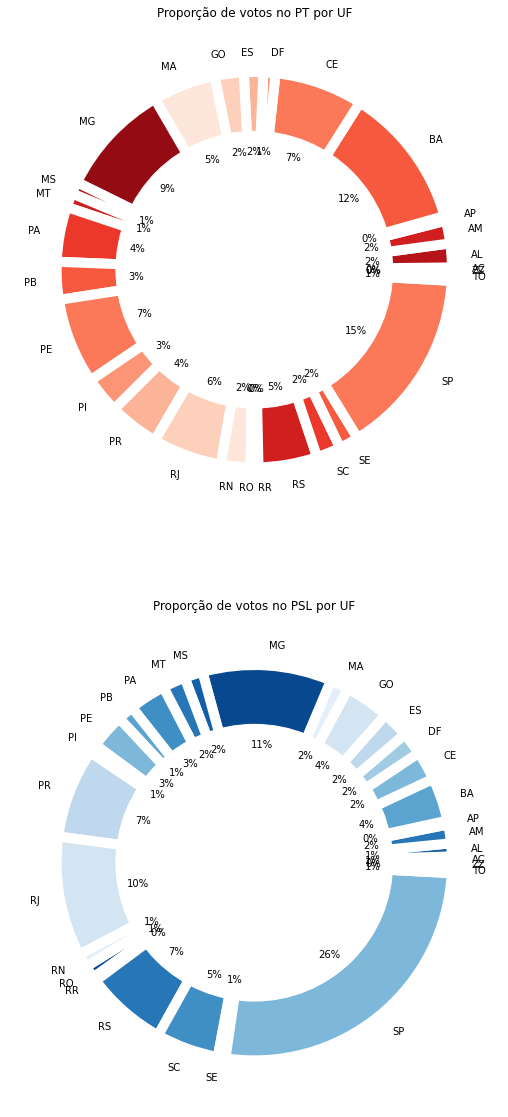

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(211)
agg = df2.groupby(["sigla_uf"]).agg({"votos_PT":"sum","votos_PSL":"sum"})

agg["votos_PT"].plot.pie(colors=sns.color_palette("Reds_r",10),
                             autopct="%1.0f%%",
                             wedgeprops={"linewidth":10,"edgecolor":"white"})

plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("Proporção de votos no PT por UF")
plt.subplot(212)
agg["votos_PSL"].plot.pie(colors=sns.color_palette("Blues_r",10),
                           autopct="%1.0f%%",
                           wedgeprops={"linewidth":10,"edgecolor":"white"})

plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("Proporção de votos no PSL por UF")
plt.show()